# Business Intelligence Fall 2023 Exam Project

This project is designed as experimental research and development of BI implementation solution. It involves systematic and creative work of finding novel, uncertain, and reproducible results by applying modern BI and artificial intelligence (AI) technologies in a context. 

The development workflow goes through four stages and milestones, each of which has an objective, tasks,
and deliverables.

## Stage 1: Problem Definition
### Objective: Foundation of a business case and problem statement

https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data

1. At this stage you brainstorm, browse sources of inspiration and information, collect ideas and discuss business or social domains, where BI and AI can bring a value.
2. Choose one of your ideas and define context, purpose, research questions, and hypotheses for a BI problem statement. Write a brief annotation of your project, in about four sentences, explaining:
     - which challenge you would like to address?
     - why is it important or interesting research goal?
     - what is the expected solution your project would provide?
     - what would be the impact of the solution and which category of users could benefit from it?
3. Prepare the development environment
     - give a title to your project
     - plan and organise the execution of the individual tasks in terms of time, milestones, deliverables, team members engagement
     - prepare the development platform and procedures – Github repository, IDE, software tools
4. Create and upload the initial project document with the information from above in a .md file in your repository as an initial release of the project. 

## Stage 2: Data Preparation


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

### Objective: Data collection, exploration and pre-processing
Based on the ideas and assumptions defined at the previous stage:
1. Collect and load relevant data from various sources
2. Clean and integrate the collected data in appropriate data structures. Apply any transformations needed for the integration and the operations - ETL (Extract Transform Load) or ELT (Extract Load Transform).
3. Explore the data by applying measures from statistics to discover its basic features. Create charts and diagrams to visualize the features for better understanding and support of further decisions.
4. Apply the necessary pre-processing to prepare the data for machine learning analysis, ensuring that the data is:
    - Meaningful – describes relevant and correctly measured features and observations.
    - Sufficient – describes various cases and feature occurrences, decided by testing.
    - Shaped – presented in a structure, appropriate for processing by machine learning algorithms.
    - Cleaned – repaired from missing values and outliners.
    - Scaled – transform data distributions in comparable scales, when necessary.
    - Engineered – analyse all features and select the most informative for further processing.
    
Export your initial version of the solution to the Github repository.

In [12]:
#Dresen Links:
#df_travel= pd.read_csv('../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/traveldistmin.csv')
#df_infl= pd.read_csv('../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/US_inflation_rates.csv')
#df_remoteWork = pd.read_excel('../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/statistic_id1356325_us-workers-working-hybrid-or-remote-vs-on-site-2019-q4-2022.xlsx', sheet_name='Data')
#df_happiness = pd.read_excel('../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/statistic_id1111316_struggles-with-working-remotely-2020-2022.xlsx', sheet_name='Data')
#df = pd.read_csv('../../../../OneDrive/Dokumenter/GitHub/github-bi/BI-Fall-2023-Exam-Project/Data/ds_salaries2.csv')

In [13]:
#df_travel= pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/traveldistmin.csv')
#df_infl= pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/US_inflation_rates.csv')
#df_remoteWork = pd.read_excel('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/statistic_id1356325_us-workers-working-hybrid-or-remote-vs-on-site-2019-q4-2022.xlsx', sheet_name='Data')
#df_happiness = pd.read_excel('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/statistic_id1111316_struggles-with-working-remotely-2020-2022.xlsx', sheet_name='Data')
#df_sal = pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/ds_salaries2.csv')

In [14]:
df_inflation= pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/US_inflation_rates.csv')

df_inflation.head()

,date,value
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [15]:
list(df_inflation)

['date', 'value']

In [16]:
df_inflation

,date,value
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
913,2023-02-01,301.648
914,2023-03-01,301.808
915,2023-04-01,302.918
916,2023-05-01,303.294


In [17]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    918 non-null    object 
 1   value   918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB


In [18]:
df_inflation.isnull().sum()

date     0
value    0
dtype: int64

<Axes: >

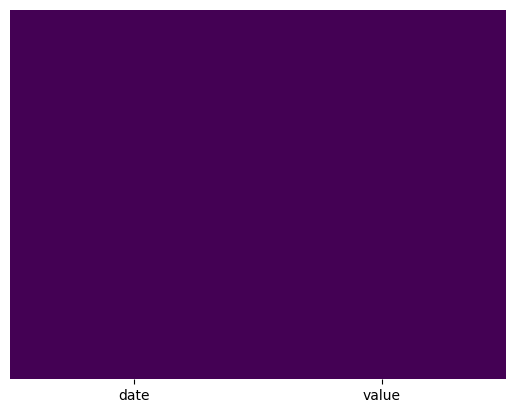

In [19]:
sns.heatmap(df_inflation.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [20]:
df_inflation.describe()

,value
count,918.000000
mean,117.794828
std,83.736360
min,21.480000
25%,32.105000
50%,106.900000
75%,188.000000
max,303.841000


In [21]:
df_inflation.sample(5)

,date,value
212,1964-09-01,31.080
204,1964-01-01,30.940
303,1972-04-01,41.500
726,2007-07-01,207.603
426,1982-07-01,97.500


In [22]:
# Convert the 'date' column to datetime if it's not already
df_inflation['date'] = pd.to_datetime(df_inflation['date'])

# Extract the year from the 'date' column
df_inflation['year'] = df_inflation['date'].dt.year

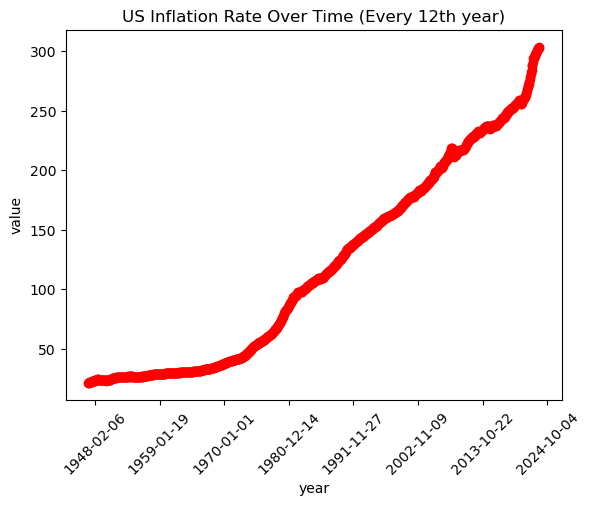

In [23]:
# plot the cleaned dataframe from the US Inflation dataset
plt.xlabel('year')
plt.ylabel('value')
plt.scatter(df_inflation.date, df_inflation.value, color='red')
plt.title('US Inflation Rate Over Time (Every 12th year)')
# Set the x-axis ticks to show only every year
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Show only integer values on the x-axis
plt.show()


In [24]:
df_inflation.head()

,date,value,year
0,1947-01-01,21.48,1947
1,1947-02-01,21.62,1947
2,1947-03-01,22.00,1947
3,1947-04-01,22.00,1947
4,1947-05-01,21.95,1947


In [25]:
# Filter the DataFrame to include only the first 12 years of data
#start_year = min(df_inflation.date.dt.year)
#end_year = start_year + 12
#filtered_df = df_inflation[(df_inflation.date.dt.year >= start_year) & (df_inflation.date.dt.year <= end_year)]

# Create the scatter plot with the filtered data
#plt.xlabel('Year')
#plt.ylabel('Inflation Value')
#plt.scatter(filtered_df.date, filtered_df.value, color='red')
#plt.title('US Inflation Rate Over the First 12 Years (1947-1960)')
#plt.xticks(rotation=45)  # Rotate x-axis labels for readability
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Show only integer values on the x-axis
#plt.show()

C:\Users\Johan\AppData\Local\Temp\ipykernel_22568\3839249195.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_inflation['year'], label='year', norm_hist=True)


<Axes: xlabel='year', ylabel='Density'>

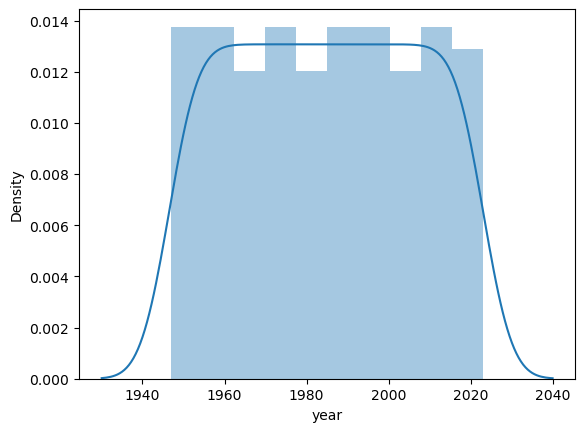

In [26]:
# Create a histogram of the years
#sns.histplot(filtered_df['year'], label='year')
sns.distplot(df_inflation['year'], label='year', norm_hist=True)

C:\Users\Johan\AppData\Local\Temp\ipykernel_22568\3676746267.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_inflation['value'], label='value', norm_hist=True)


<Axes: xlabel='value', ylabel='Density'>

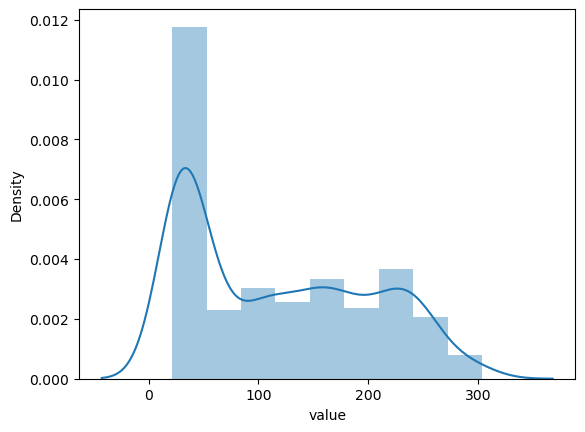

In [27]:
# Create a histogram of the years
sns.distplot(df_inflation['value'], label='value', norm_hist=True)

### Train the data model

#### Split the Data in Dependent y and Independent X Data Sets

In [28]:
X = df_inflation['year'].values.reshape(-1, 1)

In [29]:
y = df_inflation['value'].values.reshape(-1, 1)

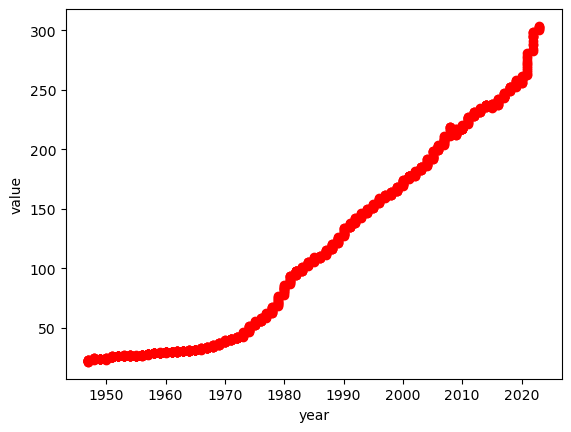

In [30]:
plt.xlabel('year')
plt.ylabel('value')
plt.scatter(X, y, color = 'red')
plt.show()

In [31]:
df_inflation.head()

,date,value,year
0,1947-01-01,21.48,1947
1,1947-02-01,21.62,1947
2,1947-03-01,22.00,1947
3,1947-04-01,22.00,1947
4,1947-05-01,21.95,1947


#### Split the Data in Training and Testing Sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(734, 1)
(734, 1)
(184, 1)
(184, 1)


In [34]:
y_test

array([[ 55.9  ],
       [177.7  ],
       [ 22.4  ],
       [149.   ],
       [ 29.81 ],
       [ 29.98 ],
       [140.5  ],
       [ 28.87 ],
       [262.035],
       [152.1  ],
       [135.1  ],
       [207.603],
       [ 30.48 ],
       [ 68.5  ],
       [235.547],
       [ 41.8  ],
       [298.598],
       [218.69 ],
       [ 36.3  ],
       [ 51.9  ],
       [ 26.99 ],
       [ 29.84 ],
       [182.9  ],
       [ 29.   ],
       [ 61.6  ],
       [181.2  ],
       [183.2  ],
       [260.286],
       [135.6  ],
       [ 29.61 ],
       [ 28.89 ],
       [146.7  ],
       [242.026],
       [216.509],
       [ 30.94 ],
       [ 79.   ],
       [ 36.8  ],
       [ 49.   ],
       [193.7  ],
       [203.1  ],
       [251.663],
       [249.529],
       [ 80.9  ],
       [ 30.21 ],
       [153.1  ],
       [109.7  ],
       [ 29.81 ],
       [ 22.08 ],
       [ 30.72 ],
       [ 32.92 ],
       [ 33.4  ],
       [ 40.1  ],
       [ 23.88 ],
       [178.5  ],
       [ 41.2  ],
       [ 4

In [35]:
myreg = LinearRegression()

In [36]:
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [37]:
a = myreg.coef_
b = myreg.intercept_

In [38]:
a

array([[3.7052336]])

In [39]:
b

array([-7235.98309691])

In [40]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[ 85.55848805],
       [178.18932794],
       [-21.89328622],
       [152.25269277],
       [ 29.97998412],
       [ 29.97998412],
       [144.84222558],
       [ 18.86428333],
       [248.58876626],
       [155.95792637],
       [141.13699199],
       [200.42072952],
       [ 37.39045131],
       [ 96.67418884],
       [226.35736469],
       [ 70.73755367],
       [255.99923345],
       [204.12596311],
       [ 59.62185288],
       [ 78.14802086],
       [  4.04334895],
       [ 29.97998412],
       [185.59979513],
       [ 22.56951693],
       [ 89.26372165],
       [181.89456154],
       [185.59979513],
       [248.58876626],
       [141.13699199],
       [ 26.27475052],
       [ 18.86428333],
       [152.25269277],
       [233.76783188],
       [207.83119671],
       [ 41.0956849 ],
       [100.37942243],
       [ 59.62185288],
       [ 78.14802086],
       [193.01026232],
       [196.71549592],
       [241.17829907],
       [241.17829907],
       [100.37942243],
       [ 33

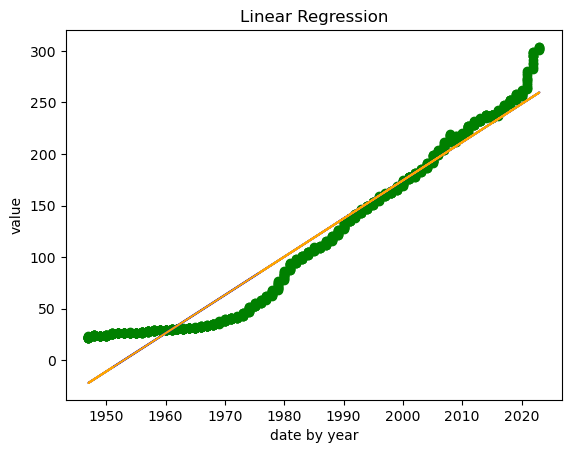

In [41]:
# Visualize the Linear Regression
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('date by year')
plt.ylabel('value')
plt.show()

In [42]:
R2 = myreg.score(X, y)
R2

0.9517383505382754

### Polytfit
#### Split the Data in Dependent y and Independent X Data Sets

In [43]:
X, y = df_inflation.year, df_inflation.value

#### Split the Data in Training and Testing Sets

In [44]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2) 

In [45]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(734,)
(734,)
(184,)
(184,)


In [46]:
y_train

852    248.859
121     27.800
664    179.500
187     30.280
108     26.830
        ...   
767    220.472
72      26.640
908    296.539
235     32.650
37      23.610
Name: value, Length: 734, dtype: float64

In [47]:
df_inflation.head()

,date,value,year
0,1947-01-01,21.48,1947
1,1947-02-01,21.62,1947
2,1947-03-01,22.00,1947
3,1947-04-01,22.00,1947
4,1947-05-01,21.95,1947


#### Train data model

In [48]:
# build a model from the train data with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [49]:
model

array([ 3.69983720e+00, -7.22596232e+03])

In [50]:
a, b = model[0], model[1]

In [51]:
test = np.polyfit(X_test, y_test, 1)
test

array([ 3.68037556e+00, -7.18482064e+03])

In [52]:
a1, b1 = test[0], test[1]

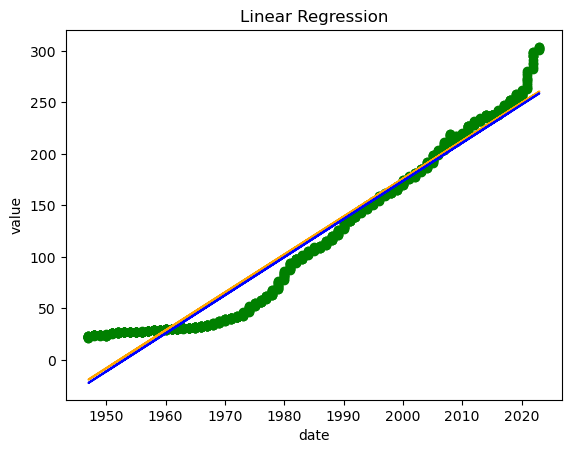

In [53]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.plot(X_train, a*X_train + b, color='blue')

plt.xlabel('date')
plt.ylabel('value')
plt.show()

### Test the models

#### Test with Known Data

In [54]:
date_predicted = myreg.predict([[2000]])
date_predicted

array([[174.48409435]])

In [55]:
date_predict = a*2000 + b
date_predict

173.71208611957718

### Predict with unknown Data

In [56]:
value = 400
date_predicted = myreg.predict([[value]])
date_predicted

array([[-5753.88965866]])

In [57]:
df_inflation.head()

,date,value,year
0,1947-01-01,21.48,1947
1,1947-02-01,21.62,1947
2,1947-03-01,22.00,1947
3,1947-04-01,22.00,1947
4,1947-05-01,21.95,1947


In [35]:
df = pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/ds_salaries2.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
0,0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES
1,1,2023,MI,CT,ML Engineer,30000,US,100,US
2,2,2023,MI,CT,ML Engineer,25500,US,100,US
3,3,2023,SE,FT,Data Scientist,175000,CA,100,CA
4,4,2023,SE,FT,Data Scientist,120000,CA,100,CA


In [36]:
#new_df = df[['TRVLCMIN','TRPMILES']]
#new_df=df.drop(['salary', 'salary_currency', 'company_size'], axis = 1)
#new_df.to_csv('/Users/emiliocastrolagunas/Documents/GitHub/BI-Fall-2023-Exam-Project/Data/ds_salaries2.csv') #gemmer til fil
#new_df.to_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/ds_salaries2.csv')
new_df=df

In [37]:
new_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
0,0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES
1,1,2023,MI,CT,ML Engineer,30000,US,100,US
2,2,2023,MI,CT,ML Engineer,25500,US,100,US
3,3,2023,SE,FT,Data Scientist,175000,CA,100,CA
4,4,2023,SE,FT,Data Scientist,120000,CA,100,CA


In [38]:
sal_df = new_df[df['employee_residence'].str.contains('US')]

In [40]:
sal_df=sal_df.drop(['Unnamed: 0'], axis=1)
sal_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
1,2023,MI,CT,ML Engineer,30000,US,100,US
2,2023,MI,CT,ML Engineer,25500,US,100,US
5,2023,SE,FT,Applied Scientist,222200,US,0,US
6,2023,SE,FT,Applied Scientist,136000,US,0,US
9,2023,SE,FT,Data Scientist,147100,US,0,US


In [41]:
sal_df.reset_index(drop=True, inplace=True)

In [42]:
non_us_locations = sal_df[~sal_df['company_location'].str.contains('US')]
non_us_locations

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
1833,2022,SE,FT,Data Analyst,171000,US,100,AU
1900,2022,EN,FT,3D Computer Vision Researcher,50000,US,100,CR
2460,2022,EN,FT,Data Scientist,50000,US,50,DE
2977,2021,SE,FT,Machine Learning Scientist,225000,US,100,CA
2988,2021,SE,FT,Data Science Manager,152000,US,100,FR


In [43]:
sal_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
0,2023,MI,CT,ML Engineer,30000,US,100,US
1,2023,MI,CT,ML Engineer,25500,US,100,US
2,2023,SE,FT,Applied Scientist,222200,US,0,US
3,2023,SE,FT,Applied Scientist,136000,US,0,US
4,2023,SE,FT,Data Scientist,147100,US,0,US
...,...,...,...,...,...,...,...,...
2999,2021,SE,FT,Data Specialist,165000,US,100,US
3000,2020,SE,FT,Data Scientist,412000,US,100,US
3001,2021,MI,FT,Principal Data Scientist,151000,US,100,US
3002,2020,EN,FT,Data Scientist,105000,US,100,US


work_year - The year the salary was paid.

experience_level - The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

employment_type - The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

job_title - The role worked in during the year.

salary - The total gross salary amount paid.

salary_currency - The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio - The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size - The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [33]:
df_travel= pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/traveldistmin.csv')
df_travel=df_travel.drop(['Unnamed: 0'], axis=1)
df_travel.head()


,TRVLCMIN,TRPMILES
0,15,5.244
1,20,5.149
2,120,84.004
3,150,81.628
4,15,2.250


In [34]:
df_travel.describe()
#The extreme values should be taken into account in this  analysis
#For example, high extreme values would be an indicator of remote working being a positive
#Negative values doesnt make any sense.

,TRVLCMIN,TRPMILES
count,923572.000000,923572.000000
mean,21.557486,11.436043
std,32.884552,74.559992
min,-9.000000,-9.000000
25%,8.000000,1.335000
50%,15.000000,3.443000
75%,25.000000,8.743000
max,1200.000000,9621.053000


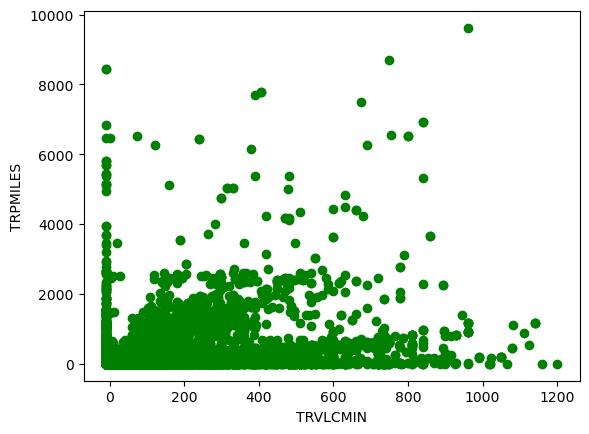

In [35]:
#As seen in the scatterplot below, there's some really odd values.
#A travel time close to 0 with more than 1000 miles traveled is impossible
plt.xlabel('TRVLCMIN')
plt.ylabel('TRPMILES')
plt.scatter(df_travel.TRVLCMIN, df_travel.TRPMILES, color='green')

In [26]:
#We made our own breakpoint for when we find the data valuable, which is as long as the miles and minutes -
# - are within the 8 times of each other, and removed all of the rows with 0-values
# Drop rows with 0 values in 'TRPMILES' or 'TRVLCMIN'
df_travel = df_travel[(df_travel['TRPMILES'] != 0) & (df_travel['TRVLCMIN'] != 0)]

# Drop rows where one value is 8 times greater than the other in the same row
df_travel = df_travel[~((df_travel['TRPMILES'] >= 8 * df_travel['TRVLCMIN']) | (df_travel['TRVLCMIN'] >= 8 * df_travel['TRPMILES']))]

print("Updated DataFrame:")
print(df_travel)


Updated DataFrame:
        TRVLCMIN  TRPMILES
0             15     5.244
1             20     5.149
2            120    84.004
3            150    81.628
4             15     2.250
...          ...       ...
923560        12     4.778
923561        26     9.115
923564        29     9.562
923565        26     9.115
923566        29     9.562

[737646 rows x 2 columns]


In [30]:
count_of_zeros_miles = np.count_nonzero(df_travel.TRPMILES == 0)
print(count_of_zeros_miles)

0


In [31]:
count_of_zeros_mins = np.count_nonzero(df_travel.TRVLCMIN == 0)
print(count_of_zeros_mins)

0


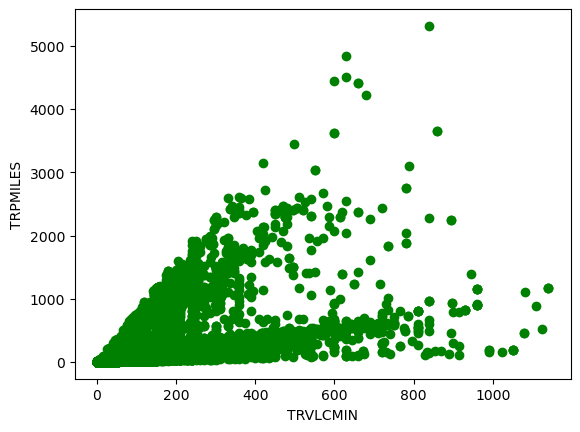

In [27]:
# As seen below this data looks much more reasonable
plt.xlabel('TRVLCMIN')
plt.ylabel('TRPMILES')
plt.scatter(df_travel.TRVLCMIN, df_travel.TRPMILES, color='green')

In [28]:
df_travel.describe()

,TRVLCMIN,TRPMILES
count,737646.000000,737646.000000
mean,22.405099,12.677658
std,32.473744,54.363180
min,1.000000,0.126000
25%,10.000000,2.276000
50%,15.000000,4.774000
75%,25.000000,10.839000
max,1140.000000,5315.834000


In [ ]:
#And now we can (roughly) tell that the average travel time is 22,4 minutes
# And average travel distance is 12,7 miles

## Stage 3: Solution Prototype
### Objective: Using data and analysis for building predictive models
Extend the data analysis by implementing machine learning and deep learning methods and algorithms.
1. Select relevant methods that could solve the problem. Train, test and validate data models by use of
supervised and unsupervised methods, neural networks or graphs.
2. Select and apply appropriate measures for assessing the quality of your models. Iterate the process to
explore possibilities for improvement the quality of the models.

Publish the new version of your solution in Github as a prototype.

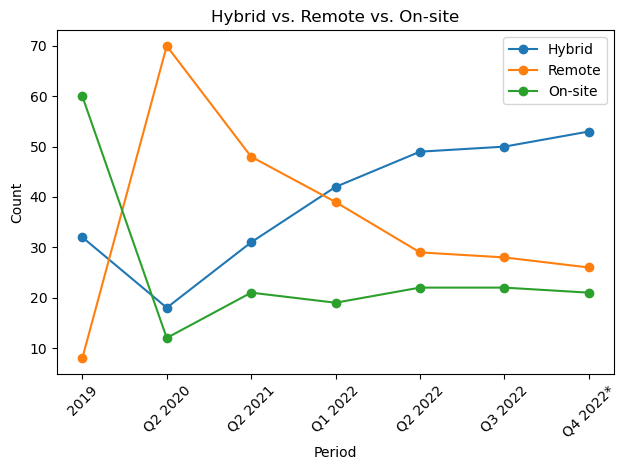

In [36]:
df_remoteWork = pd.read_excel('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/statistic_id1356325_us-workers-working-hybrid-or-remote-vs-on-site-2019-q4-2022.xlsx', sheet_name='Data')


# Create a figure and axis
fig, ax = plt.subplots()

# Plot the lines using the DataFrame columns
ax.plot(df_remoteWork['Period'], df_remoteWork['Hybrid'], label='Hybrid', marker='o')
ax.plot(df_remoteWork['Period'], df_remoteWork['Remote'], label='Remote', marker='o')
ax.plot(df_remoteWork['Period'], df_remoteWork['On-site'], label='On-site', marker='o')

# Add labels and title
ax.set_xlabel('Period')
ax.set_ylabel('Count')
ax.set_title('Hybrid vs. Remote vs. On-site')

# Add a legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Stage 4: Visualisation, Explanation and Usability Evaluation
### Objective: Present the process and the results of the analysis in human-understandable form
Extend your solution with visualisation, explanation and interpretation of the results:
1. Design and develop visual representation of the data, the analysis process, the applied methods and usage
scenarios. Consider the use of animation, 3D or VR visualisation, as appropriate.
2. Create a simple visual interface of the application to make it accessible and interactive for other users.
3. Present the visualised prototype to potential users for usability evaluation. Take notes and implement the
relevant feedback outcomes. Elaborate on the benefits of applying visualisation and explanation
techniques for data analytics.

Revise, complete, and deliver the final solution to Github and a link to it in Wiseflow.